# Experiment Analysis

Mean-focused plots + routing counts + rankings.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("seaborn-v0_8-pastel")

RESULTS_CSV = "experiment_results.csv"

results = pd.read_csv(RESULTS_CSV)
results.head()


,question,question_id,question_type,architecture,time_ms,tokens,keyword_precision_k,keyword_recall_k,semantic_precision_k,semantic_recall_k,grounding_score,routing_pipeline,routing_profile
0,How did the introduction of AI-assisted policy...,Q002,multi-hop factual,vanilla,20730.934375,131.0,1.0,0.034247,0.8,0.085106,0.832117,NaN,NaN
1,In what ways did the completion of Poland's fi...,Q001,vanilla factual,vanilla,26261.654292,202.0,1.0,0.032258,1.0,0.102041,0.793103,NaN,NaN
2,In what ways did the completion of Poland's fi...,Q001,vanilla factual,routing,24178.730375,203.0,1.0,0.032258,1.0,0.138889,0.813725,vanilla,balanced_openai
3,How did the introduction of AI-assisted policy...,Q002,multi-hop factual,query_decomposition,43052.438750,257.0,1.0,0.034247,1.0,0.078125,0.849421,NaN,NaN
4,Why do some documents disagree on whether PLD ...,Q003,conflict resolution,vanilla,14753.020209,196.0,1.0,0.038462,0.4,0.222222,0.735450,NaN,NaN


## Routing selection counts


In [2]:
routing_counts = (
    results.loc[results['architecture'] == 'routing', 'routing_pipeline']
    .value_counts(dropna=True)
    .sort_values(ascending=False)
)
routing_counts


routing_pipeline
vanilla                91
marag                   4
query_decomposition     3
madam_rag               2
Name: count, dtype: int64

## Summary table (mean/median/std)


In [3]:
metric_cols = [
    'time_ms',
    'tokens',
    'keyword_precision_k',
    'keyword_recall_k',
    'semantic_precision_k',
    'semantic_recall_k',
    'grounding_score',
]

summary = (
    results.groupby('architecture')[metric_cols]
    .agg(['mean', 'median', 'std'])
    .sort_values(('grounding_score', 'mean'), ascending=False)
)
summary


time_ms                               tokens  \
                                mean        median            std    mean   
architecture                                                                
self_reflective         94783.258258  93035.564791   20390.805368  365.17   
marag                   69874.432383  68195.840125   20808.787668  156.71   
query_decomposition     47611.656020  45877.725396   16173.263955  274.83   
vanilla                 15329.195176  14440.915146    6667.800012  138.98   
active_retrieval        38605.647280  36913.862812   12925.608741  133.67   
routing                 18728.948081  13973.480542   15921.349310  142.10   
madam_rag               75512.030110  69623.275124   26003.453319  127.44   
chain_of_verification  105496.518694  86582.315104  107808.724217  137.35   

                                         keyword_precision_k                   \
                      median         std                mean median       std   
architecture                                                                    
self_reflective        374.0  149.856231               0.994    1.0  0.044540   
marag                  148.5   85.990403               0.994    1.0  0.044540   
query_decomposition    260.0  164.194763               0.996    1.0  0.028141   
vanilla                123.0   95.956427               0.994    1.0  0.044540   
active_retrieval       120.0   97.955984               0.994    1.0  0.044540   
routing                142.5   86.390878               0.944    1.0  0.222166   
madam_rag              122.5   56.667793               0.994    1.0  0.044540   
chain_of_verification  126.0   70.676011               0.994    1.0  0.044540   

                      keyword_recall_k  ...           semantic_precision_k  \
                                  mean  ...       std                 mean   
architecture                            ...                                  
self_reflective               0.037580  ...  0.006849                0.906   
marag                         0.037580  ...  0.006849                0.764   
query_decomposition           0.037667  ...  0.006767                0.708   
vanilla                       0.037580  ...  0.006849                0.716   
active_retrieval              0.037580  ...  0.006849                0.696   
routing                       0.035803  ...  0.010704                0.718   
madam_rag                     0.037580  ...  0.006849                0.824   
chain_of_verification         0.037580  ...  0.006849                0.534   

                                       semantic_recall_k                      \
                      median       std              mean    median       std   
architecture                                                                   
self_reflective          1.0  0.201920          0.108561  0.065385  0.129644   
marag                    1.0  0.347435          0.158948  0.090648  0.177000   
query_decomposition      0.8  0.329579          0.124817  0.073802  0.146512   
vanilla                  0.8  0.346037          0.206743  0.118824  0.233353   
active_retrieval         0.8  0.371163          0.194009  0.111111  0.223587   
routing                  0.8  0.347103          0.187961  0.120499  0.198735   
madam_rag                1.0  0.265574          0.184841  0.109610  0.181462   
chain_of_verification    0.6  0.393949          0.223046  0.140394  0.247889   

                      grounding_score                      
                                 mean    median       std  
architecture                                               
self_reflective              0.834162  0.841122  0.058918  
marag                        0.818936  0.845558  0.080919  
query_decomposition          0.803331  0.810355  0.056841  
vanilla                      0.799942  0.811014  0.079740  
active_retrieval             0.793792  0.811806  0.084636  
routing                      0.766739  0.809441  0.187802  
madam_rag

## Mean latency and tokens


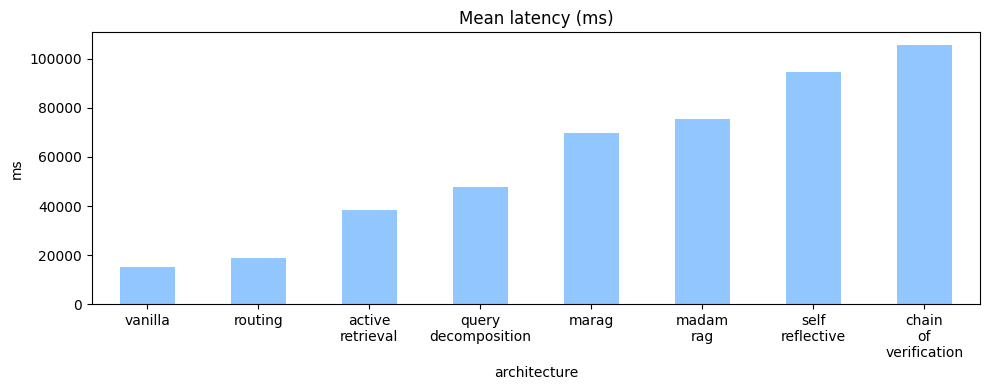

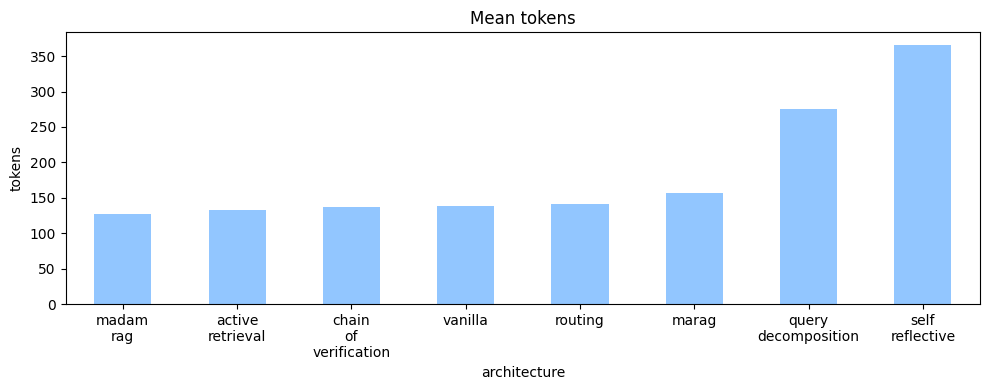

In [4]:
means = results.groupby('architecture')[['time_ms', 'tokens']].mean()

time_series = means['time_ms'].sort_values(ascending=True)
ax = time_series.plot(kind='bar', figsize=(10, 4), title='Mean latency (ms)')
ax.set_ylabel('ms')
ax.set_xticklabels([name.replace('_', '\n') for name in time_series.index], rotation=0)
plt.tight_layout()
plt.show()

token_series = means['tokens'].sort_values(ascending=True)
ax = token_series.plot(kind='bar', figsize=(10, 4), title='Mean tokens')
ax.set_ylabel('tokens')
ax.set_xticklabels([name.replace('_', '\n') for name in token_series.index], rotation=0)
plt.tight_layout()
plt.show()


## Mean scores (each separately)


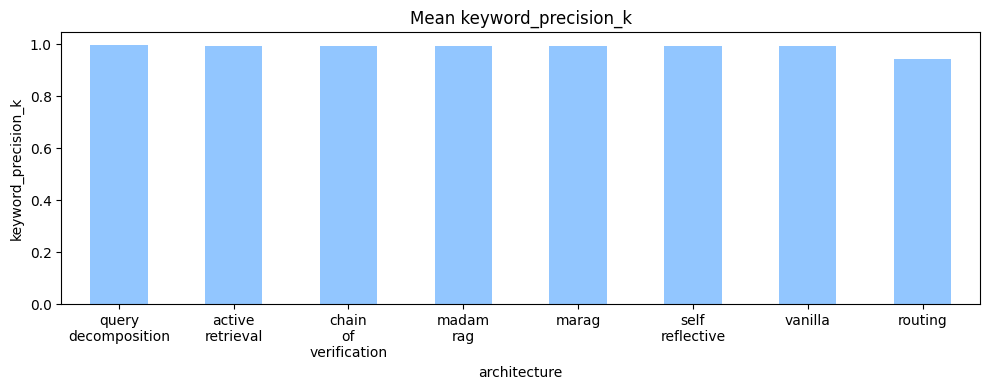

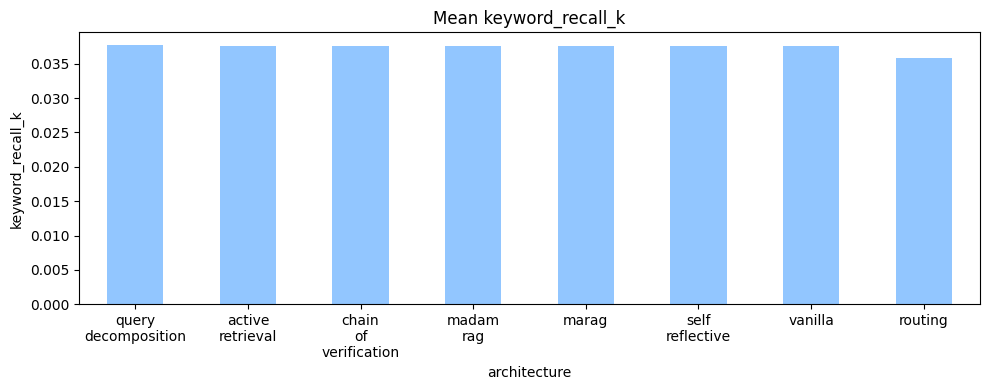

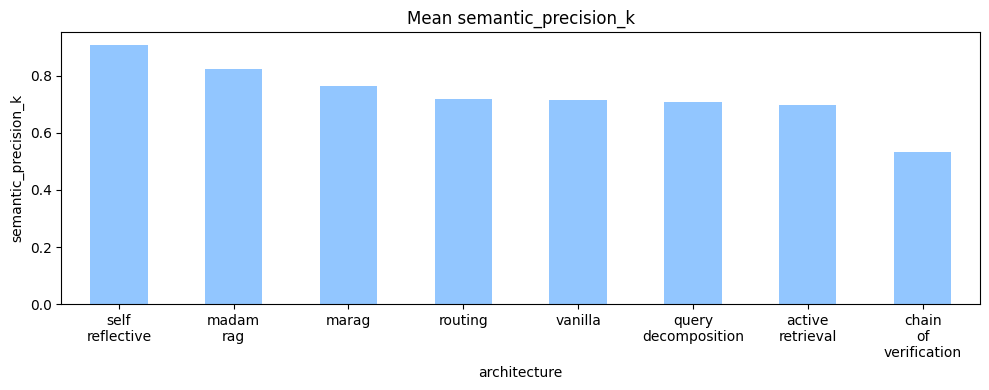

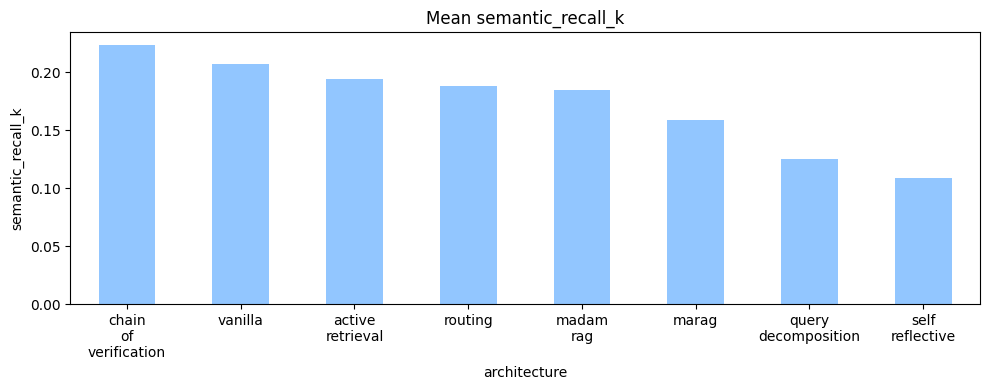

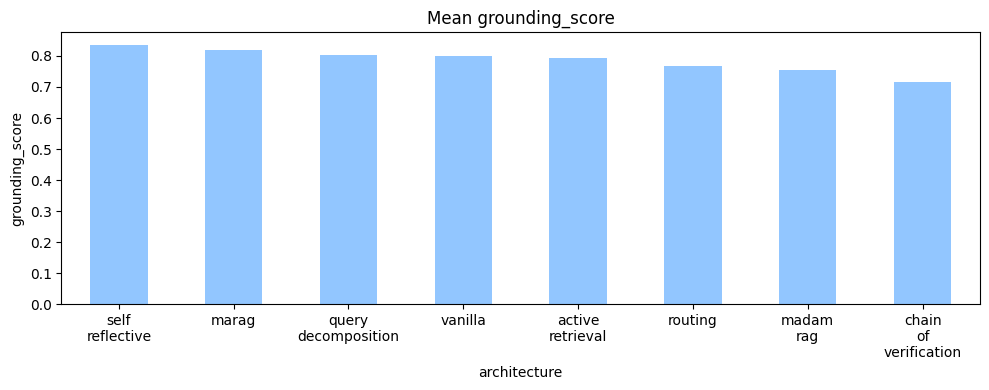

In [5]:
score_cols = [
    'keyword_precision_k',
    'keyword_recall_k',
    'semantic_precision_k',
    'semantic_recall_k',
    'grounding_score',
]

means_scores = results.groupby('architecture')[score_cols].mean()

for col in score_cols:
    series = means_scores[col].sort_values(ascending=False)
    ax = series.plot(kind='bar', figsize=(10, 4), title=f'Mean {col}')
    ax.set_ylabel(col)
    ax.set_xticklabels([name.replace('_', '\n') for name in series.index], rotation=0)
    plt.tight_layout()
    plt.show()


## Perfect 1.0 counts (precision/recall)


In [6]:
total_questions = results['question'].nunique()

perfect_counts = (
    results.groupby('architecture')[
        ['semantic_precision_k', 'semantic_recall_k']
    ]
    .agg(lambda s: (s == 1.0).sum())
    .rename(columns={
        'semantic_precision_k': 'semantic_precision_1',
        'semantic_recall_k': 'semantic_recall_1',
    })
)

perfect_counts['questions'] = total_questions
perfect_counts.sort_values('semantic_precision_1', ascending=False)


,semantic_precision_1,semantic_recall_1,questions
architecture,,,
self_reflective,77,0,100
madam_rag,60,1,100
marag,58,0,100
active_retrieval,48,2,100
routing,48,2,100
vanilla,48,4,100
query_decomposition,42,1,100
chain_of_verification,28,4,100


## Wrong 0.0 counts (precision/recall)


In [7]:
total_questions = results['question'].nunique()

perfect_counts = (
    results.groupby('architecture')[
        ['semantic_precision_k', 'semantic_recall_k']
    ]
    .agg(lambda s: (s == 0.0).sum())
    .rename(columns={
        'semantic_precision_k': 'semantic_precision_1',
        'semantic_recall_k': 'semantic_recall_1',
    })
)

perfect_counts['questions'] = total_questions
perfect_counts.sort_values('semantic_precision_1', ascending=False)


,semantic_precision_1,semantic_recall_1,questions
architecture,,,
chain_of_verification,24,24,100
active_retrieval,15,15,100
marag,12,12,100
routing,11,11,100
vanilla,11,11,100
query_decomposition,8,8,100
madam_rag,3,3,100
self_reflective,1,1,100


## Unique wins (composite quality)

Composite = semantic_precision_k + semantic_recall_k + grounding_score.
Unique win = strictly highest composite for a question.


In [8]:
results['quality_score'] = results['semantic_precision_k'] + results['semantic_recall_k'] + results['grounding_score']

winner_counts = {arch: 0 for arch in results['architecture'].unique()}
for _, group in results.groupby('question'):
    best = group['quality_score'].max()
    winners = group[group['quality_score'] == best]['architecture']
    if len(winners) == 1:
        winner_counts[winners.iloc[0]] += 1

winner_series = pd.Series(winner_counts).sort_values(ascending=False)
winner_series


self_reflective          23
marag                    19
active_retrieval         14
routing                  13
vanilla                  10
chain_of_verification     8
madam_rag                 7
query_decomposition       6
dtype: int64

## Per-question ranking and global rank by product of places

Ranking per question is based on semantic_precision_k + semantic_recall_k + grounding_score.
Ties (ex aequo) share the same place (method='min').
Uses log-sum to avoid overflow; lower is better.


In [9]:
results['quality_score'] = results['semantic_precision_k'] + results['semantic_recall_k'] + results['grounding_score']

rank_rows = []
for q, group in results.groupby('question'):
    ranks = group['quality_score'].rank(ascending=False, method='min')
    for (_, row), place in zip(group.iterrows(), ranks):
        rank_rows.append({
            'question': q,
            'architecture': row['architecture'],
            'question_type': row['question_type'],
            'quality_score': row['quality_score'],
            'place': int(place),
        })

rank_df = pd.DataFrame(rank_rows)
rank_df.head(8).sort_values(['question', 'place']).reset_index(drop=True)

,question,architecture,question_type,quality_score,place
0,How did Poland's 2120 governance reforms resha...,marag,temporal reasoning,1.964018,1
1,How did Poland's 2120 governance reforms resha...,self_reflective,temporal reasoning,1.906152,2
2,How did Poland's 2120 governance reforms resha...,active_retrieval,temporal reasoning,1.903029,3
3,How did Poland's 2120 governance reforms resha...,query_decomposition,temporal reasoning,1.884180,4
4,How did Poland's 2120 governance reforms resha...,vanilla,temporal reasoning,1.850402,5
5,How did Poland's 2120 governance reforms resha...,madam_rag,temporal reasoning,1.831845,6
6,How did Poland's 2120 governance reforms resha...,routing,temporal reasoning,1.690588,7
7,How did Poland's 2120 governance reforms resha...,chain_of_verification,temporal reasoning,1.601301,8


In [10]:
place_logs = rank_df.groupby('architecture')['place'].agg(lambda s: np.log(s).sum())
product_rank = place_logs.sort_values().rename('place_product_logsum')
product_rank

architecture
marag                    106.188469
self_reflective          110.169673
active_retrieval         121.567201
vanilla                  122.350255
routing                  127.495255
madam_rag                147.584518
query_decomposition      156.248498
chain_of_verification    161.094112
Name: place_product_logsum, dtype: float64

## Exemplery Answer

In [11]:
import json

data = json.load(open("experiment_logs.json", "r"))

In [12]:
exemplery_results = []

In [13]:
for record in data:
    if record['question_id'] == 'Q012':
        exemplery_results.append({
            'question': record['question'],
            'architecture': record['architecture'],
            'answer': record['answer'],
            'reference_answer': record['reference_answer'],
        })

exemplery_results = pd.DataFrame(exemplery_results)

In [14]:
print(f"Question: {exemplery_results.loc[0, 'question']}")
print(f"Reference Answer: {exemplery_results.loc[0, 'reference_answer']}")
for idx, row in exemplery_results.iterrows():
    print(f"\nArchitecture: {row['architecture']}\nAnswer: {row['answer']}")

Question: What long-term economic pathways were enabled by Poland becoming a net exporter of modular nuclear energy after 2061?
Reference Answer: According to the documents, post-2061 energy exports positioned Poland as a regional stabilizer capable of supporting Baltic and Nordic grids during demand fluctuations. This export capacity enabled new industrial clusters tied to energy-intensive manufacturing, allowing domestic firms to operate with predictable baseload supply. Revenues from nuclear exports also fueled innovation funds, retraining programs, and cooperation platforms for cross-border digital infrastructure. Analysts note that the shift elevated Poland's geopolitical leverage and deepened integration within the Baltic Security Compact. In the long-term, nuclear exports became a backbone of both national resilience and regional interdependence.

Architecture: vanilla
Answer: - It reshaped regional bargaining power and influenced the design of interconnectors.
- It energized a 

In [15]:
rank_df.groupby(['architecture', 'question_type'])['place'].mean().unstack()

question_type,abstractive summary,aggregation reasoning,causal reasoning,comparative reasoning,conflict resolution,contextual reasoning,counterfactual,multi-hop factual,temporal reasoning,vanilla factual
architecture,,,,,,,,,,
active_retrieval,4.3,4.777778,4.333333,4.888889,3.866667,3.533333,3.0,4.571429,4.2,2.0
chain_of_verification,5.8,5.333333,5.000000,5.222222,6.133333,5.466667,7.0,5.785714,5.8,8.0
madam_rag,6.6,4.777778,5.250000,4.222222,4.866667,5.000000,4.3,4.500000,5.4,7.0
marag,1.4,3.888889,3.500000,3.333333,3.666667,4.466667,4.5,3.214286,2.8,3.0
query_decomposition,5.5,4.777778,5.500000,5.444444,4.466667,6.600000,4.7,5.285714,5.4,6.0
routing,3.6,4.444444,4.250000,3.444444,4.666667,4.066667,4.5,4.357143,5.4,1.0
self_reflective,5.1,3.777778,4.083333,4.333333,3.266667,3.800000,2.0,4.000000,3.4,5.0
vanilla,3.7,3.888889,3.833333,5.000000,4.666667,3.066667,3.6,4.071429,3.6,4.0


In [16]:
avg_place = (
    rank_df.groupby(['question_type', 'architecture'])['place']
    .mean()
    .reset_index()
)

avg_place['rank_in_type'] = avg_place.groupby('question_type')['place']\
    .rank(method='min', ascending=True)

ranking_by_type = avg_place.sort_values(['question_type', 'rank_in_type', 'place'])
ranking_by_type


,question_type,architecture,place,rank_in_type
3,abstractive summary,marag,1.4,1.0
5,abstractive summary,routing,3.6,2.0
7,abstractive summary,vanilla,3.7,3.0
0,abstractive summary,active_retrieval,4.3,4.0
6,abstractive summary,self_reflective,5.1,5.0
...,...,...,...,...
79,vanilla factual,vanilla,4.0,4.0
78,vanilla factual,self_reflective,5.0,5.0
76,vanilla factual,query_decomposition,6.0,6.0
74,vanilla factual,madam_rag,7.0,7.0


In [17]:
rank_table = ranking_by_type.pivot(
    index='architecture', columns='question_type', values='rank_in_type'
).sort_index()
rank_table


question_type,abstractive summary,aggregation reasoning,causal reasoning,comparative reasoning,conflict resolution,contextual reasoning,counterfactual,multi-hop factual,temporal reasoning,vanilla factual
architecture,,,,,,,,,,
active_retrieval,4.0,5.0,5.0,5.0,3.0,2.0,2.0,6.0,4.0,2.0
chain_of_verification,7.0,8.0,6.0,7.0,8.0,7.0,8.0,8.0,8.0,8.0
madam_rag,8.0,5.0,7.0,3.0,7.0,6.0,4.0,5.0,5.0,7.0
marag,1.0,2.0,1.0,1.0,2.0,5.0,5.0,1.0,1.0,3.0
query_decomposition,6.0,5.0,8.0,8.0,4.0,8.0,7.0,7.0,5.0,6.0
routing,2.0,4.0,4.0,2.0,5.0,4.0,5.0,4.0,5.0,1.0
self_reflective,5.0,1.0,3.0,4.0,1.0,3.0,1.0,2.0,2.0,5.0
vanilla,3.0,2.0,2.0,6.0,5.0,1.0,3.0,3.0,3.0,4.0


## Exemplery Results

In [24]:
import json

data = json.load(open("experiment_logs.json", "r"))

In [25]:
exemplery_results = []

In [ ]:
for record in data:
    if record['question_id'] == 'Q001':
        exemplery_results.append({
            'question': record['question'],
            'architecture': record['architecture'],
            'answer': record['answer'],
            'reference_answer': record['reference_answer'],
        })

exemplery_results = pd.DataFrame(exemplery_results)

In [29]:
print(f"Question: {exemplery_results.loc[0, 'question']}")
print(f"Reference Answer: {exemplery_results.loc[0, 'reference_answer']}")
for idx, row in exemplery_results.iterrows():
    print(f"\nArchitecture: {row['architecture']}\nAnswer: {row['answer']}")

Question: In what ways did the completion of Poland's first large-scale nuclear plant in 2035 influence early energy policy debates across the 2035-2040 period?
Reference Answer: Across the documents, the 2035 completion of the first large-scale nuclear plant is framed as a stabilizing milestone that allowed Poland to reduce its dependence on volatile energy imports and accelerate diversification. Several analyses note that even though some sources mention alternative dates such as 2034 or 2036, the consensus points to 2035 as the operational turning point. This event provided policymakers with the confidence to commit to long-term transitions, including modular reactor expansion and the integration of nuclear energy into the broader Baltic grid. Discussions in the late 2030s often referenced the plant as proof that complex infrastructural projects could be delivered amid climate and economic uncertainty. As a result, nuclear energy quickly became an anchor for subsequent energy and in